In [1]:
import numpy as np
import pandas as pd
import h5py
import os
from matplotlib import pyplot as plt
import cv2

In [2]:
test_list = pd.read_csv('data/adobe240fps/test_list.txt',header=None)
train_list = pd.read_csv('data/adobe240fps/train_list.txt',header=None)

In [3]:
path = "data/train/resize/"

data_length = len(os.walk(path).__next__()[1])
picNum= 0

for i in range(data_length):
    #frame_length = len(os.walk("data/train/resize/"+train_list.iloc[i,0].split('.')[0]).__next__()[2])-8
    frame_length = len(os.walk(path+train_list.iloc[i,0].split('.')[0]).__next__()[2])-8
    picNum += frame_length

size = cv2.imread(path+ train_list.iloc[0,0].split('.')[0] + "/frame0" + ".jpg", cv2.IMREAD_COLOR)    
print(picNum)
print(size.shape)

HIGHT = size.shape[0]
WIDTH = size.shape[1]
print(HIGHT)
print(WIDTH)

101599
(192, 320, 3)
192
320


In [10]:
filename = 'data load/half/resize.hdf5'
path = "data/train/resize/"

with h5py.File(filename, 'w') as f:
    f.create_dataset('image_x0', (picNum, HIGHT, WIDTH, 3), dtype='uint8')    # 1000개의 32x32 RGB 이미지를 담는 데이터 공간을 생성한다. 
    f.create_dataset('image_x1', (picNum, HIGHT, WIDTH, 3), dtype='uint8')
    #f.create_dataset('image_x', (picNum, HIGHT, WIDTH, 3), dtype='uint8')
    f.create_dataset('image_y', (picNum, 2, HIGHT, WIDTH, 3), dtype='uint8')
    #f.create_dataset('image_y', (picNum-(8*112), 2, HIGHT, WIDTH, 3), dtype='uint8')
    
    image_x0 = f['image_x0']    # 실 데이터 공간에 접근할 변수를 할당한다. 
    image_x1 = f['image_x1']
    #image_x = f['image_x']
    image_y = f['image_y']
    
    count = 0
    print("start count %d"%count)
    for i in range(len(train_list)):
        length = len(os.walk("data/train/resize/"+train_list.iloc[i,0].split('.')[0]).__next__()[2])-8
        #length = len(os.walk("data/train/resize/"+train_list.iloc[i,0].split('.')[0]).__next__()[2])
        print("%d / %d"%(i+1, len(train_list)))
        for j in range(length):
            if j%10 == 0:
                print("frame %d / %d"%(j,length))
            image_x0[count] = cv2.imread("data/train/resize/"+ train_list.iloc[i,0].split('.')[0] + "/frame%d"%j + ".jpg", cv2.IMREAD_COLOR)    
            image_x1[count] = cv2.imread("data/train/resize/"+ train_list.iloc[i,0].split('.')[0] + "/frame%d"%(j+8) + ".jpg", cv2.IMREAD_COLOR)
            #image_x[count] = cv2.imread("data/train/resize/"+ train_list.iloc[i,0].split('.')[0] + "/frame%d"%j + ".jpg", cv2.IMREAD_COLOR)
            #if(j<length-8):
            image_y[count,0] = cv2.imread("data/train/resizeflow/"+ train_list.iloc[i,0].split('.')[0] + "/frame%d_01"%j + ".jpg", cv2.IMREAD_COLOR)    
            image_y[count,1] = cv2.imread("data/train/resizeflow/"+ train_list.iloc[i,0].split('.')[0] + "/frame%d_10"%j + ".jpg", cv2.IMREAD_COLOR)    
            count += 1

start count 0
1 / 112
frame 0 / 292
frame 10 / 292
frame 20 / 292
frame 30 / 292
frame 40 / 292
frame 50 / 292
frame 60 / 292
frame 70 / 292
frame 80 / 292
frame 90 / 292
frame 100 / 292
frame 110 / 292
frame 120 / 292
frame 130 / 292
frame 140 / 292
frame 150 / 292
frame 160 / 292
frame 170 / 292
frame 180 / 292
frame 190 / 292
frame 200 / 292
frame 210 / 292
frame 220 / 292
frame 230 / 292
frame 240 / 292
frame 250 / 292
frame 260 / 292
frame 270 / 292
frame 280 / 292
frame 290 / 292
2 / 112
frame 0 / 471
frame 10 / 471
frame 20 / 471
frame 30 / 471
frame 40 / 471
frame 50 / 471
frame 60 / 471
frame 70 / 471
frame 80 / 471
frame 90 / 471
frame 100 / 471
frame 110 / 471
frame 120 / 471
frame 130 / 471
frame 140 / 471
frame 150 / 471
frame 160 / 471
frame 170 / 471
frame 180 / 471
frame 190 / 471
frame 200 / 471
frame 210 / 471
frame 220 / 471
frame 230 / 471
frame 240 / 471
frame 250 / 471
frame 260 / 471
frame 270 / 471
frame 280 / 471
frame 290 / 471
frame 300 / 471
frame 310 / 471


frame 580 / 696
frame 590 / 696
frame 600 / 696
frame 610 / 696
frame 620 / 696
frame 630 / 696
frame 640 / 696
frame 650 / 696
frame 660 / 696
frame 670 / 696
frame 680 / 696
frame 690 / 696
11 / 112
frame 0 / 376
frame 10 / 376
frame 20 / 376
frame 30 / 376
frame 40 / 376
frame 50 / 376
frame 60 / 376
frame 70 / 376
frame 80 / 376
frame 90 / 376
frame 100 / 376
frame 110 / 376
frame 120 / 376
frame 130 / 376
frame 140 / 376
frame 150 / 376
frame 160 / 376
frame 170 / 376
frame 180 / 376
frame 190 / 376
frame 200 / 376
frame 210 / 376
frame 220 / 376
frame 230 / 376
frame 240 / 376
frame 250 / 376
frame 260 / 376
frame 270 / 376
frame 280 / 376
frame 290 / 376
frame 300 / 376
frame 310 / 376
frame 320 / 376
frame 330 / 376
frame 340 / 376
frame 350 / 376
frame 360 / 376
frame 370 / 376
12 / 112
frame 0 / 773
frame 10 / 773
frame 20 / 773
frame 30 / 773
frame 40 / 773
frame 50 / 773
frame 60 / 773
frame 70 / 773
frame 80 / 773
frame 90 / 773
frame 100 / 773
frame 110 / 773
frame 120 / 

frame 460 / 544
frame 470 / 544
frame 480 / 544
frame 490 / 544
frame 500 / 544
frame 510 / 544
frame 520 / 544
frame 530 / 544
frame 540 / 544
19 / 112
frame 0 / 775
frame 10 / 775
frame 20 / 775
frame 30 / 775
frame 40 / 775
frame 50 / 775
frame 60 / 775
frame 70 / 775
frame 80 / 775
frame 90 / 775
frame 100 / 775
frame 110 / 775
frame 120 / 775
frame 130 / 775
frame 140 / 775
frame 150 / 775
frame 160 / 775
frame 170 / 775
frame 180 / 775
frame 190 / 775
frame 200 / 775
frame 210 / 775
frame 220 / 775
frame 230 / 775
frame 240 / 775
frame 250 / 775
frame 260 / 775
frame 270 / 775
frame 280 / 775
frame 290 / 775
frame 300 / 775
frame 310 / 775
frame 320 / 775
frame 330 / 775
frame 340 / 775
frame 350 / 775
frame 360 / 775
frame 370 / 775
frame 380 / 775
frame 390 / 775
frame 400 / 775
frame 410 / 775
frame 420 / 775
frame 430 / 775
frame 440 / 775
frame 450 / 775
frame 460 / 775
frame 470 / 775
frame 480 / 775
frame 490 / 775
frame 500 / 775
frame 510 / 775
frame 520 / 775
frame 530 

frame 690 / 1961
frame 700 / 1961
frame 710 / 1961
frame 720 / 1961
frame 730 / 1961
frame 740 / 1961
frame 750 / 1961
frame 760 / 1961
frame 770 / 1961
frame 780 / 1961
frame 790 / 1961
frame 800 / 1961
frame 810 / 1961
frame 820 / 1961
frame 830 / 1961
frame 840 / 1961
frame 850 / 1961
frame 860 / 1961
frame 870 / 1961
frame 880 / 1961
frame 890 / 1961
frame 900 / 1961
frame 910 / 1961
frame 920 / 1961
frame 930 / 1961
frame 940 / 1961
frame 950 / 1961
frame 960 / 1961
frame 970 / 1961
frame 980 / 1961
frame 990 / 1961
frame 1000 / 1961
frame 1010 / 1961
frame 1020 / 1961
frame 1030 / 1961
frame 1040 / 1961
frame 1050 / 1961
frame 1060 / 1961
frame 1070 / 1961
frame 1080 / 1961
frame 1090 / 1961
frame 1100 / 1961
frame 1110 / 1961
frame 1120 / 1961
frame 1130 / 1961
frame 1140 / 1961
frame 1150 / 1961
frame 1160 / 1961
frame 1170 / 1961
frame 1180 / 1961
frame 1190 / 1961
frame 1200 / 1961
frame 1210 / 1961
frame 1220 / 1961
frame 1230 / 1961
frame 1240 / 1961
frame 1250 / 1961
frame

frame 620 / 1054
frame 630 / 1054
frame 640 / 1054
frame 650 / 1054
frame 660 / 1054
frame 670 / 1054
frame 680 / 1054
frame 690 / 1054
frame 700 / 1054
frame 710 / 1054
frame 720 / 1054
frame 730 / 1054
frame 740 / 1054
frame 750 / 1054
frame 760 / 1054
frame 770 / 1054
frame 780 / 1054
frame 790 / 1054
frame 800 / 1054
frame 810 / 1054
frame 820 / 1054
frame 830 / 1054
frame 840 / 1054
frame 850 / 1054
frame 860 / 1054
frame 870 / 1054
frame 880 / 1054
frame 890 / 1054
frame 900 / 1054
frame 910 / 1054
frame 920 / 1054
frame 930 / 1054
frame 940 / 1054
frame 950 / 1054
frame 960 / 1054
frame 970 / 1054
frame 980 / 1054
frame 990 / 1054
frame 1000 / 1054
frame 1010 / 1054
frame 1020 / 1054
frame 1030 / 1054
frame 1040 / 1054
frame 1050 / 1054
28 / 112
frame 0 / 915
frame 10 / 915
frame 20 / 915
frame 30 / 915
frame 40 / 915
frame 50 / 915
frame 60 / 915
frame 70 / 915
frame 80 / 915
frame 90 / 915
frame 100 / 915
frame 110 / 915
frame 120 / 915
frame 130 / 915
frame 140 / 915
frame 15

frame 1220 / 1888
frame 1230 / 1888
frame 1240 / 1888
frame 1250 / 1888
frame 1260 / 1888
frame 1270 / 1888
frame 1280 / 1888
frame 1290 / 1888
frame 1300 / 1888
frame 1310 / 1888
frame 1320 / 1888
frame 1330 / 1888
frame 1340 / 1888
frame 1350 / 1888
frame 1360 / 1888
frame 1370 / 1888
frame 1380 / 1888
frame 1390 / 1888
frame 1400 / 1888
frame 1410 / 1888
frame 1420 / 1888
frame 1430 / 1888
frame 1440 / 1888
frame 1450 / 1888
frame 1460 / 1888
frame 1470 / 1888
frame 1480 / 1888
frame 1490 / 1888
frame 1500 / 1888
frame 1510 / 1888
frame 1520 / 1888
frame 1530 / 1888
frame 1540 / 1888
frame 1550 / 1888
frame 1560 / 1888
frame 1570 / 1888
frame 1580 / 1888
frame 1590 / 1888
frame 1600 / 1888
frame 1610 / 1888
frame 1620 / 1888
frame 1630 / 1888
frame 1640 / 1888
frame 1650 / 1888
frame 1660 / 1888
frame 1670 / 1888
frame 1680 / 1888
frame 1690 / 1888
frame 1700 / 1888
frame 1710 / 1888
frame 1720 / 1888
frame 1730 / 1888
frame 1740 / 1888
frame 1750 / 1888
frame 1760 / 1888
frame 1770

frame 1070 / 3315
frame 1080 / 3315
frame 1090 / 3315
frame 1100 / 3315
frame 1110 / 3315
frame 1120 / 3315
frame 1130 / 3315
frame 1140 / 3315
frame 1150 / 3315
frame 1160 / 3315
frame 1170 / 3315
frame 1180 / 3315
frame 1190 / 3315
frame 1200 / 3315
frame 1210 / 3315
frame 1220 / 3315
frame 1230 / 3315
frame 1240 / 3315
frame 1250 / 3315
frame 1260 / 3315
frame 1270 / 3315
frame 1280 / 3315
frame 1290 / 3315
frame 1300 / 3315
frame 1310 / 3315
frame 1320 / 3315
frame 1330 / 3315
frame 1340 / 3315
frame 1350 / 3315
frame 1360 / 3315
frame 1370 / 3315
frame 1380 / 3315
frame 1390 / 3315
frame 1400 / 3315
frame 1410 / 3315
frame 1420 / 3315
frame 1430 / 3315
frame 1440 / 3315
frame 1450 / 3315
frame 1460 / 3315
frame 1470 / 3315
frame 1480 / 3315
frame 1490 / 3315
frame 1500 / 3315
frame 1510 / 3315
frame 1520 / 3315
frame 1530 / 3315
frame 1540 / 3315
frame 1550 / 3315
frame 1560 / 3315
frame 1570 / 3315
frame 1580 / 3315
frame 1590 / 3315
frame 1600 / 3315
frame 1610 / 3315
frame 1620

frame 970 / 1131
frame 980 / 1131
frame 990 / 1131
frame 1000 / 1131
frame 1010 / 1131
frame 1020 / 1131
frame 1030 / 1131
frame 1040 / 1131
frame 1050 / 1131
frame 1060 / 1131
frame 1070 / 1131
frame 1080 / 1131
frame 1090 / 1131
frame 1100 / 1131
frame 1110 / 1131
frame 1120 / 1131
frame 1130 / 1131
41 / 112
frame 0 / 1193
frame 10 / 1193
frame 20 / 1193
frame 30 / 1193
frame 40 / 1193
frame 50 / 1193
frame 60 / 1193
frame 70 / 1193
frame 80 / 1193
frame 90 / 1193
frame 100 / 1193
frame 110 / 1193
frame 120 / 1193
frame 130 / 1193
frame 140 / 1193
frame 150 / 1193
frame 160 / 1193
frame 170 / 1193
frame 180 / 1193
frame 190 / 1193
frame 200 / 1193
frame 210 / 1193
frame 220 / 1193
frame 230 / 1193
frame 240 / 1193
frame 250 / 1193
frame 260 / 1193
frame 270 / 1193
frame 280 / 1193
frame 290 / 1193
frame 300 / 1193
frame 310 / 1193
frame 320 / 1193
frame 330 / 1193
frame 340 / 1193
frame 350 / 1193
frame 360 / 1193
frame 370 / 1193
frame 380 / 1193
frame 390 / 1193
frame 400 / 1193
fr

frame 1020 / 1848
frame 1030 / 1848
frame 1040 / 1848
frame 1050 / 1848
frame 1060 / 1848
frame 1070 / 1848
frame 1080 / 1848
frame 1090 / 1848
frame 1100 / 1848
frame 1110 / 1848
frame 1120 / 1848
frame 1130 / 1848
frame 1140 / 1848
frame 1150 / 1848
frame 1160 / 1848
frame 1170 / 1848
frame 1180 / 1848
frame 1190 / 1848
frame 1200 / 1848
frame 1210 / 1848
frame 1220 / 1848
frame 1230 / 1848
frame 1240 / 1848
frame 1250 / 1848
frame 1260 / 1848
frame 1270 / 1848
frame 1280 / 1848
frame 1290 / 1848
frame 1300 / 1848
frame 1310 / 1848
frame 1320 / 1848
frame 1330 / 1848
frame 1340 / 1848
frame 1350 / 1848
frame 1360 / 1848
frame 1370 / 1848
frame 1380 / 1848
frame 1390 / 1848
frame 1400 / 1848
frame 1410 / 1848
frame 1420 / 1848
frame 1430 / 1848
frame 1440 / 1848
frame 1450 / 1848
frame 1460 / 1848
frame 1470 / 1848
frame 1480 / 1848
frame 1490 / 1848
frame 1500 / 1848
frame 1510 / 1848
frame 1520 / 1848
frame 1530 / 1848
frame 1540 / 1848
frame 1550 / 1848
frame 1560 / 1848
frame 1570

frame 160 / 727
frame 170 / 727
frame 180 / 727
frame 190 / 727
frame 200 / 727
frame 210 / 727
frame 220 / 727
frame 230 / 727
frame 240 / 727
frame 250 / 727
frame 260 / 727
frame 270 / 727
frame 280 / 727
frame 290 / 727
frame 300 / 727
frame 310 / 727
frame 320 / 727
frame 330 / 727
frame 340 / 727
frame 350 / 727
frame 360 / 727
frame 370 / 727
frame 380 / 727
frame 390 / 727
frame 400 / 727
frame 410 / 727
frame 420 / 727
frame 430 / 727
frame 440 / 727
frame 450 / 727
frame 460 / 727
frame 470 / 727
frame 480 / 727
frame 490 / 727
frame 500 / 727
frame 510 / 727
frame 520 / 727
frame 530 / 727
frame 540 / 727
frame 550 / 727
frame 560 / 727
frame 570 / 727
frame 580 / 727
frame 590 / 727
frame 600 / 727
frame 610 / 727
frame 620 / 727
frame 630 / 727
frame 640 / 727
frame 650 / 727
frame 660 / 727
frame 670 / 727
frame 680 / 727
frame 690 / 727
frame 700 / 727
frame 710 / 727
frame 720 / 727
48 / 112
frame 0 / 1541
frame 10 / 1541
frame 20 / 1541
frame 30 / 1541
frame 40 / 1541


frame 1140 / 1287
frame 1150 / 1287
frame 1160 / 1287
frame 1170 / 1287
frame 1180 / 1287
frame 1190 / 1287
frame 1200 / 1287
frame 1210 / 1287
frame 1220 / 1287
frame 1230 / 1287
frame 1240 / 1287
frame 1250 / 1287
frame 1260 / 1287
frame 1270 / 1287
frame 1280 / 1287
51 / 112
frame 0 / 338
frame 10 / 338
frame 20 / 338
frame 30 / 338
frame 40 / 338
frame 50 / 338
frame 60 / 338
frame 70 / 338
frame 80 / 338
frame 90 / 338
frame 100 / 338
frame 110 / 338
frame 120 / 338
frame 130 / 338
frame 140 / 338
frame 150 / 338
frame 160 / 338
frame 170 / 338
frame 180 / 338
frame 190 / 338
frame 200 / 338
frame 210 / 338
frame 220 / 338
frame 230 / 338
frame 240 / 338
frame 250 / 338
frame 260 / 338
frame 270 / 338
frame 280 / 338
frame 290 / 338
frame 300 / 338
frame 310 / 338
frame 320 / 338
frame 330 / 338
52 / 112
frame 0 / 327
frame 10 / 327
frame 20 / 327
frame 30 / 327
frame 40 / 327
frame 50 / 327
frame 60 / 327
frame 70 / 327
frame 80 / 327
frame 90 / 327
frame 100 / 327
frame 110 / 32

frame 60 / 881
frame 70 / 881
frame 80 / 881
frame 90 / 881
frame 100 / 881
frame 110 / 881
frame 120 / 881
frame 130 / 881
frame 140 / 881
frame 150 / 881
frame 160 / 881
frame 170 / 881
frame 180 / 881
frame 190 / 881
frame 200 / 881
frame 210 / 881
frame 220 / 881
frame 230 / 881
frame 240 / 881
frame 250 / 881
frame 260 / 881
frame 270 / 881
frame 280 / 881
frame 290 / 881
frame 300 / 881
frame 310 / 881
frame 320 / 881
frame 330 / 881
frame 340 / 881
frame 350 / 881
frame 360 / 881
frame 370 / 881
frame 380 / 881
frame 390 / 881
frame 400 / 881
frame 410 / 881
frame 420 / 881
frame 430 / 881
frame 440 / 881
frame 450 / 881
frame 460 / 881
frame 470 / 881
frame 480 / 881
frame 490 / 881
frame 500 / 881
frame 510 / 881
frame 520 / 881
frame 530 / 881
frame 540 / 881
frame 550 / 881
frame 560 / 881
frame 570 / 881
frame 580 / 881
frame 590 / 881
frame 600 / 881
frame 610 / 881
frame 620 / 881
frame 630 / 881
frame 640 / 881
frame 650 / 881
frame 660 / 881
frame 670 / 881
frame 680 / 

frame 110 / 923
frame 120 / 923
frame 130 / 923
frame 140 / 923
frame 150 / 923
frame 160 / 923
frame 170 / 923
frame 180 / 923
frame 190 / 923
frame 200 / 923
frame 210 / 923
frame 220 / 923
frame 230 / 923
frame 240 / 923
frame 250 / 923
frame 260 / 923
frame 270 / 923
frame 280 / 923
frame 290 / 923
frame 300 / 923
frame 310 / 923
frame 320 / 923
frame 330 / 923
frame 340 / 923
frame 350 / 923
frame 360 / 923
frame 370 / 923
frame 380 / 923
frame 390 / 923
frame 400 / 923
frame 410 / 923
frame 420 / 923
frame 430 / 923
frame 440 / 923
frame 450 / 923
frame 460 / 923
frame 470 / 923
frame 480 / 923
frame 490 / 923
frame 500 / 923
frame 510 / 923
frame 520 / 923
frame 530 / 923
frame 540 / 923
frame 550 / 923
frame 560 / 923
frame 570 / 923
frame 580 / 923
frame 590 / 923
frame 600 / 923
frame 610 / 923
frame 620 / 923
frame 630 / 923
frame 640 / 923
frame 650 / 923
frame 660 / 923
frame 670 / 923
frame 680 / 923
frame 690 / 923
frame 700 / 923
frame 710 / 923
frame 720 / 923
frame 73

frame 1430 / 1797
frame 1440 / 1797
frame 1450 / 1797
frame 1460 / 1797
frame 1470 / 1797
frame 1480 / 1797
frame 1490 / 1797
frame 1500 / 1797
frame 1510 / 1797
frame 1520 / 1797
frame 1530 / 1797
frame 1540 / 1797
frame 1550 / 1797
frame 1560 / 1797
frame 1570 / 1797
frame 1580 / 1797
frame 1590 / 1797
frame 1600 / 1797
frame 1610 / 1797
frame 1620 / 1797
frame 1630 / 1797
frame 1640 / 1797
frame 1650 / 1797
frame 1660 / 1797
frame 1670 / 1797
frame 1680 / 1797
frame 1690 / 1797
frame 1700 / 1797
frame 1710 / 1797
frame 1720 / 1797
frame 1730 / 1797
frame 1740 / 1797
frame 1750 / 1797
frame 1760 / 1797
frame 1770 / 1797
frame 1780 / 1797
frame 1790 / 1797
69 / 112
frame 0 / 2801
frame 10 / 2801
frame 20 / 2801
frame 30 / 2801
frame 40 / 2801
frame 50 / 2801
frame 60 / 2801
frame 70 / 2801
frame 80 / 2801
frame 90 / 2801
frame 100 / 2801
frame 110 / 2801
frame 120 / 2801
frame 130 / 2801
frame 140 / 2801
frame 150 / 2801
frame 160 / 2801
frame 170 / 2801
frame 180 / 2801
frame 190 / 2

frame 550 / 554
73 / 112
frame 0 / 815
frame 10 / 815
frame 20 / 815
frame 30 / 815
frame 40 / 815
frame 50 / 815
frame 60 / 815
frame 70 / 815
frame 80 / 815
frame 90 / 815
frame 100 / 815
frame 110 / 815
frame 120 / 815
frame 130 / 815
frame 140 / 815
frame 150 / 815
frame 160 / 815
frame 170 / 815
frame 180 / 815
frame 190 / 815
frame 200 / 815
frame 210 / 815
frame 220 / 815
frame 230 / 815
frame 240 / 815
frame 250 / 815
frame 260 / 815
frame 270 / 815
frame 280 / 815
frame 290 / 815
frame 300 / 815
frame 310 / 815
frame 320 / 815
frame 330 / 815
frame 340 / 815
frame 350 / 815
frame 360 / 815
frame 370 / 815
frame 380 / 815
frame 390 / 815
frame 400 / 815
frame 410 / 815
frame 420 / 815
frame 430 / 815
frame 440 / 815
frame 450 / 815
frame 460 / 815
frame 470 / 815
frame 480 / 815
frame 490 / 815
frame 500 / 815
frame 510 / 815
frame 520 / 815
frame 530 / 815
frame 540 / 815
frame 550 / 815
frame 560 / 815
frame 570 / 815
frame 580 / 815
frame 590 / 815
frame 600 / 815
frame 610 

frame 1230 / 1496
frame 1240 / 1496
frame 1250 / 1496
frame 1260 / 1496
frame 1270 / 1496
frame 1280 / 1496
frame 1290 / 1496
frame 1300 / 1496
frame 1310 / 1496
frame 1320 / 1496
frame 1330 / 1496
frame 1340 / 1496
frame 1350 / 1496
frame 1360 / 1496
frame 1370 / 1496
frame 1380 / 1496
frame 1390 / 1496
frame 1400 / 1496
frame 1410 / 1496
frame 1420 / 1496
frame 1430 / 1496
frame 1440 / 1496
frame 1450 / 1496
frame 1460 / 1496
frame 1470 / 1496
frame 1480 / 1496
frame 1490 / 1496
78 / 112
frame 0 / 606
frame 10 / 606
frame 20 / 606
frame 30 / 606
frame 40 / 606
frame 50 / 606
frame 60 / 606
frame 70 / 606
frame 80 / 606
frame 90 / 606
frame 100 / 606
frame 110 / 606
frame 120 / 606
frame 130 / 606
frame 140 / 606
frame 150 / 606
frame 160 / 606
frame 170 / 606
frame 180 / 606
frame 190 / 606
frame 200 / 606
frame 210 / 606
frame 220 / 606
frame 230 / 606
frame 240 / 606
frame 250 / 606
frame 260 / 606
frame 270 / 606
frame 280 / 606
frame 290 / 606
frame 300 / 606
frame 310 / 606
fram

frame 730 / 1695
frame 740 / 1695
frame 750 / 1695
frame 760 / 1695
frame 770 / 1695
frame 780 / 1695
frame 790 / 1695
frame 800 / 1695
frame 810 / 1695
frame 820 / 1695
frame 830 / 1695
frame 840 / 1695
frame 850 / 1695
frame 860 / 1695
frame 870 / 1695
frame 880 / 1695
frame 890 / 1695
frame 900 / 1695
frame 910 / 1695
frame 920 / 1695
frame 930 / 1695
frame 940 / 1695
frame 950 / 1695
frame 960 / 1695
frame 970 / 1695
frame 980 / 1695
frame 990 / 1695
frame 1000 / 1695
frame 1010 / 1695
frame 1020 / 1695
frame 1030 / 1695
frame 1040 / 1695
frame 1050 / 1695
frame 1060 / 1695
frame 1070 / 1695
frame 1080 / 1695
frame 1090 / 1695
frame 1100 / 1695
frame 1110 / 1695
frame 1120 / 1695
frame 1130 / 1695
frame 1140 / 1695
frame 1150 / 1695
frame 1160 / 1695
frame 1170 / 1695
frame 1180 / 1695
frame 1190 / 1695
frame 1200 / 1695
frame 1210 / 1695
frame 1220 / 1695
frame 1230 / 1695
frame 1240 / 1695
frame 1250 / 1695
frame 1260 / 1695
frame 1270 / 1695
frame 1280 / 1695
frame 1290 / 1695
f

frame 390 / 1133
frame 400 / 1133
frame 410 / 1133
frame 420 / 1133
frame 430 / 1133
frame 440 / 1133
frame 450 / 1133
frame 460 / 1133
frame 470 / 1133
frame 480 / 1133
frame 490 / 1133
frame 500 / 1133
frame 510 / 1133
frame 520 / 1133
frame 530 / 1133
frame 540 / 1133
frame 550 / 1133
frame 560 / 1133
frame 570 / 1133
frame 580 / 1133
frame 590 / 1133
frame 600 / 1133
frame 610 / 1133
frame 620 / 1133
frame 630 / 1133
frame 640 / 1133
frame 650 / 1133
frame 660 / 1133
frame 670 / 1133
frame 680 / 1133
frame 690 / 1133
frame 700 / 1133
frame 710 / 1133
frame 720 / 1133
frame 730 / 1133
frame 740 / 1133
frame 750 / 1133
frame 760 / 1133
frame 770 / 1133
frame 780 / 1133
frame 790 / 1133
frame 800 / 1133
frame 810 / 1133
frame 820 / 1133
frame 830 / 1133
frame 840 / 1133
frame 850 / 1133
frame 860 / 1133
frame 870 / 1133
frame 880 / 1133
frame 890 / 1133
frame 900 / 1133
frame 910 / 1133
frame 920 / 1133
frame 930 / 1133
frame 940 / 1133
frame 950 / 1133
frame 960 / 1133
frame 970 / 11

frame 280 / 822
frame 290 / 822
frame 300 / 822
frame 310 / 822
frame 320 / 822
frame 330 / 822
frame 340 / 822
frame 350 / 822
frame 360 / 822
frame 370 / 822
frame 380 / 822
frame 390 / 822
frame 400 / 822
frame 410 / 822
frame 420 / 822
frame 430 / 822
frame 440 / 822
frame 450 / 822
frame 460 / 822
frame 470 / 822
frame 480 / 822
frame 490 / 822
frame 500 / 822
frame 510 / 822
frame 520 / 822
frame 530 / 822
frame 540 / 822
frame 550 / 822
frame 560 / 822
frame 570 / 822
frame 580 / 822
frame 590 / 822
frame 600 / 822
frame 610 / 822
frame 620 / 822
frame 630 / 822
frame 640 / 822
frame 650 / 822
frame 660 / 822
frame 670 / 822
frame 680 / 822
frame 690 / 822
frame 700 / 822
frame 710 / 822
frame 720 / 822
frame 730 / 822
frame 740 / 822
frame 750 / 822
frame 760 / 822
frame 770 / 822
frame 780 / 822
frame 790 / 822
frame 800 / 822
frame 810 / 822
frame 820 / 822
96 / 112
frame 0 / 779
frame 10 / 779
frame 20 / 779
frame 30 / 779
frame 40 / 779
frame 50 / 779
frame 60 / 779
frame 7

frame 40 / 735
frame 50 / 735
frame 60 / 735
frame 70 / 735
frame 80 / 735
frame 90 / 735
frame 100 / 735
frame 110 / 735
frame 120 / 735
frame 130 / 735
frame 140 / 735
frame 150 / 735
frame 160 / 735
frame 170 / 735
frame 180 / 735
frame 190 / 735
frame 200 / 735
frame 210 / 735
frame 220 / 735
frame 230 / 735
frame 240 / 735
frame 250 / 735
frame 260 / 735
frame 270 / 735
frame 280 / 735
frame 290 / 735
frame 300 / 735
frame 310 / 735
frame 320 / 735
frame 330 / 735
frame 340 / 735
frame 350 / 735
frame 360 / 735
frame 370 / 735
frame 380 / 735
frame 390 / 735
frame 400 / 735
frame 410 / 735
frame 420 / 735
frame 430 / 735
frame 440 / 735
frame 450 / 735
frame 460 / 735
frame 470 / 735
frame 480 / 735
frame 490 / 735
frame 500 / 735
frame 510 / 735
frame 520 / 735
frame 530 / 735
frame 540 / 735
frame 550 / 735
frame 560 / 735
frame 570 / 735
frame 580 / 735
frame 590 / 735
frame 600 / 735
frame 610 / 735
frame 620 / 735
frame 630 / 735
frame 640 / 735
frame 650 / 735
frame 660 / 73

frame 170 / 516
frame 180 / 516
frame 190 / 516
frame 200 / 516
frame 210 / 516
frame 220 / 516
frame 230 / 516
frame 240 / 516
frame 250 / 516
frame 260 / 516
frame 270 / 516
frame 280 / 516
frame 290 / 516
frame 300 / 516
frame 310 / 516
frame 320 / 516
frame 330 / 516
frame 340 / 516
frame 350 / 516
frame 360 / 516
frame 370 / 516
frame 380 / 516
frame 390 / 516
frame 400 / 516
frame 410 / 516
frame 420 / 516
frame 430 / 516
frame 440 / 516
frame 450 / 516
frame 460 / 516
frame 470 / 516
frame 480 / 516
frame 490 / 516
frame 500 / 516
frame 510 / 516
109 / 112
frame 0 / 661
frame 10 / 661
frame 20 / 661
frame 30 / 661
frame 40 / 661
frame 50 / 661
frame 60 / 661
frame 70 / 661
frame 80 / 661
frame 90 / 661
frame 100 / 661
frame 110 / 661
frame 120 / 661
frame 130 / 661
frame 140 / 661
frame 150 / 661
frame 160 / 661
frame 170 / 661
frame 180 / 661
frame 190 / 661
frame 200 / 661
frame 210 / 661
frame 220 / 661
frame 230 / 661
frame 240 / 661
frame 250 / 661
frame 260 / 661
frame 270

In [4]:
filename = 'data load/half/resize_y.hdf5'
path = "data/train/resize/"

with h5py.File(filename, 'w') as f:
    f.create_dataset('image_y0', (picNum, HIGHT, WIDTH, 3), dtype='uint8')
    f.create_dataset('image_y1', (picNum, HIGHT, WIDTH, 3), dtype='uint8')
    image_y0 = f['image_y0']
    image_y1 = f['image_y1']
    
    count = 0
    print("start count %d"%count)
    for i in range(len(train_list)):
        length = len(os.walk("data/train/resize/"+train_list.iloc[i,0].split('.')[0]).__next__()[2])-8
        print("%d / %d"%(i+1, len(train_list)))
        for j in range(length):
            if j%10 == 0:
                print("frame %d / %d"%(j,length))
            image_y0[count] = cv2.imread("data/train/resizeflow/"+ train_list.iloc[i,0].split('.')[0] + "/frame%d_01"%j + ".jpg", cv2.IMREAD_COLOR)    
            image_y1[count] = cv2.imread("data/train/resizeflow/"+ train_list.iloc[i,0].split('.')[0] + "/frame%d_10"%j + ".jpg", cv2.IMREAD_COLOR)    
            count += 1

start count 0
1 / 112
frame 0 / 292
frame 10 / 292
frame 20 / 292
frame 30 / 292
frame 40 / 292
frame 50 / 292
frame 60 / 292
frame 70 / 292
frame 80 / 292
frame 90 / 292
frame 100 / 292
frame 110 / 292
frame 120 / 292
frame 130 / 292
frame 140 / 292
frame 150 / 292
frame 160 / 292
frame 170 / 292
frame 180 / 292
frame 190 / 292
frame 200 / 292
frame 210 / 292
frame 220 / 292
frame 230 / 292
frame 240 / 292
frame 250 / 292
frame 260 / 292
frame 270 / 292
frame 280 / 292
frame 290 / 292
2 / 112
frame 0 / 471
frame 10 / 471
frame 20 / 471
frame 30 / 471
frame 40 / 471
frame 50 / 471
frame 60 / 471
frame 70 / 471
frame 80 / 471
frame 90 / 471
frame 100 / 471
frame 110 / 471
frame 120 / 471
frame 130 / 471
frame 140 / 471
frame 150 / 471
frame 160 / 471
frame 170 / 471
frame 180 / 471
frame 190 / 471
frame 200 / 471
frame 210 / 471
frame 220 / 471
frame 230 / 471
frame 240 / 471
frame 250 / 471
frame 260 / 471
frame 270 / 471
frame 280 / 471
frame 290 / 471
frame 300 / 471
frame 310 / 471


frame 590 / 696
frame 600 / 696
frame 610 / 696
frame 620 / 696
frame 630 / 696
frame 640 / 696
frame 650 / 696
frame 660 / 696
frame 670 / 696
frame 680 / 696
frame 690 / 696
11 / 112
frame 0 / 376
frame 10 / 376
frame 20 / 376
frame 30 / 376
frame 40 / 376
frame 50 / 376
frame 60 / 376
frame 70 / 376
frame 80 / 376
frame 90 / 376
frame 100 / 376
frame 110 / 376
frame 120 / 376
frame 130 / 376
frame 140 / 376
frame 150 / 376
frame 160 / 376
frame 170 / 376
frame 180 / 376
frame 190 / 376
frame 200 / 376
frame 210 / 376
frame 220 / 376
frame 230 / 376
frame 240 / 376
frame 250 / 376
frame 260 / 376
frame 270 / 376
frame 280 / 376
frame 290 / 376
frame 300 / 376
frame 310 / 376
frame 320 / 376
frame 330 / 376
frame 340 / 376
frame 350 / 376
frame 360 / 376
frame 370 / 376
12 / 112
frame 0 / 773
frame 10 / 773
frame 20 / 773
frame 30 / 773
frame 40 / 773
frame 50 / 773
frame 60 / 773
frame 70 / 773
frame 80 / 773
frame 90 / 773
frame 100 / 773
frame 110 / 773
frame 120 / 773
frame 130 / 

frame 470 / 544
frame 480 / 544
frame 490 / 544
frame 500 / 544
frame 510 / 544
frame 520 / 544
frame 530 / 544
frame 540 / 544
19 / 112
frame 0 / 775
frame 10 / 775
frame 20 / 775
frame 30 / 775
frame 40 / 775
frame 50 / 775
frame 60 / 775
frame 70 / 775
frame 80 / 775
frame 90 / 775
frame 100 / 775
frame 110 / 775
frame 120 / 775
frame 130 / 775
frame 140 / 775
frame 150 / 775
frame 160 / 775
frame 170 / 775
frame 180 / 775
frame 190 / 775
frame 200 / 775
frame 210 / 775
frame 220 / 775
frame 230 / 775
frame 240 / 775
frame 250 / 775
frame 260 / 775
frame 270 / 775
frame 280 / 775
frame 290 / 775
frame 300 / 775
frame 310 / 775
frame 320 / 775
frame 330 / 775
frame 340 / 775
frame 350 / 775
frame 360 / 775
frame 370 / 775
frame 380 / 775
frame 390 / 775
frame 400 / 775
frame 410 / 775
frame 420 / 775
frame 430 / 775
frame 440 / 775
frame 450 / 775
frame 460 / 775
frame 470 / 775
frame 480 / 775
frame 490 / 775
frame 500 / 775
frame 510 / 775
frame 520 / 775
frame 530 / 775
frame 540 

frame 700 / 1961
frame 710 / 1961
frame 720 / 1961
frame 730 / 1961
frame 740 / 1961
frame 750 / 1961
frame 760 / 1961
frame 770 / 1961
frame 780 / 1961
frame 790 / 1961
frame 800 / 1961
frame 810 / 1961
frame 820 / 1961
frame 830 / 1961
frame 840 / 1961
frame 850 / 1961
frame 860 / 1961
frame 870 / 1961
frame 880 / 1961
frame 890 / 1961
frame 900 / 1961
frame 910 / 1961
frame 920 / 1961
frame 930 / 1961
frame 940 / 1961
frame 950 / 1961
frame 960 / 1961
frame 970 / 1961
frame 980 / 1961
frame 990 / 1961
frame 1000 / 1961
frame 1010 / 1961
frame 1020 / 1961
frame 1030 / 1961
frame 1040 / 1961
frame 1050 / 1961
frame 1060 / 1961
frame 1070 / 1961
frame 1080 / 1961
frame 1090 / 1961
frame 1100 / 1961
frame 1110 / 1961
frame 1120 / 1961
frame 1130 / 1961
frame 1140 / 1961
frame 1150 / 1961
frame 1160 / 1961
frame 1170 / 1961
frame 1180 / 1961
frame 1190 / 1961
frame 1200 / 1961
frame 1210 / 1961
frame 1220 / 1961
frame 1230 / 1961
frame 1240 / 1961
frame 1250 / 1961
frame 1260 / 1961
fram

frame 640 / 1054
frame 650 / 1054
frame 660 / 1054
frame 670 / 1054
frame 680 / 1054
frame 690 / 1054
frame 700 / 1054
frame 710 / 1054
frame 720 / 1054
frame 730 / 1054
frame 740 / 1054
frame 750 / 1054
frame 760 / 1054
frame 770 / 1054
frame 780 / 1054
frame 790 / 1054
frame 800 / 1054
frame 810 / 1054
frame 820 / 1054
frame 830 / 1054
frame 840 / 1054
frame 850 / 1054
frame 860 / 1054
frame 870 / 1054
frame 880 / 1054
frame 890 / 1054
frame 900 / 1054
frame 910 / 1054
frame 920 / 1054
frame 930 / 1054
frame 940 / 1054
frame 950 / 1054
frame 960 / 1054
frame 970 / 1054
frame 980 / 1054
frame 990 / 1054
frame 1000 / 1054
frame 1010 / 1054
frame 1020 / 1054
frame 1030 / 1054
frame 1040 / 1054
frame 1050 / 1054
28 / 112
frame 0 / 915
frame 10 / 915
frame 20 / 915
frame 30 / 915
frame 40 / 915
frame 50 / 915
frame 60 / 915
frame 70 / 915
frame 80 / 915
frame 90 / 915
frame 100 / 915
frame 110 / 915
frame 120 / 915
frame 130 / 915
frame 140 / 915
frame 150 / 915
frame 160 / 915
frame 170 

frame 1250 / 1888
frame 1260 / 1888
frame 1270 / 1888
frame 1280 / 1888
frame 1290 / 1888
frame 1300 / 1888
frame 1310 / 1888
frame 1320 / 1888
frame 1330 / 1888
frame 1340 / 1888
frame 1350 / 1888
frame 1360 / 1888
frame 1370 / 1888
frame 1380 / 1888
frame 1390 / 1888
frame 1400 / 1888
frame 1410 / 1888
frame 1420 / 1888
frame 1430 / 1888
frame 1440 / 1888
frame 1450 / 1888
frame 1460 / 1888
frame 1470 / 1888
frame 1480 / 1888
frame 1490 / 1888
frame 1500 / 1888
frame 1510 / 1888
frame 1520 / 1888
frame 1530 / 1888
frame 1540 / 1888
frame 1550 / 1888
frame 1560 / 1888
frame 1570 / 1888
frame 1580 / 1888
frame 1590 / 1888
frame 1600 / 1888
frame 1610 / 1888
frame 1620 / 1888
frame 1630 / 1888
frame 1640 / 1888
frame 1650 / 1888
frame 1660 / 1888
frame 1670 / 1888
frame 1680 / 1888
frame 1690 / 1888
frame 1700 / 1888
frame 1710 / 1888
frame 1720 / 1888
frame 1730 / 1888
frame 1740 / 1888
frame 1750 / 1888
frame 1760 / 1888
frame 1770 / 1888
frame 1780 / 1888
frame 1790 / 1888
frame 1800

frame 1120 / 3315
frame 1130 / 3315
frame 1140 / 3315
frame 1150 / 3315
frame 1160 / 3315
frame 1170 / 3315
frame 1180 / 3315
frame 1190 / 3315
frame 1200 / 3315
frame 1210 / 3315
frame 1220 / 3315
frame 1230 / 3315
frame 1240 / 3315
frame 1250 / 3315
frame 1260 / 3315
frame 1270 / 3315
frame 1280 / 3315
frame 1290 / 3315
frame 1300 / 3315
frame 1310 / 3315
frame 1320 / 3315
frame 1330 / 3315
frame 1340 / 3315
frame 1350 / 3315
frame 1360 / 3315
frame 1370 / 3315
frame 1380 / 3315
frame 1390 / 3315
frame 1400 / 3315
frame 1410 / 3315
frame 1420 / 3315
frame 1430 / 3315
frame 1440 / 3315
frame 1450 / 3315
frame 1460 / 3315
frame 1470 / 3315
frame 1480 / 3315
frame 1490 / 3315
frame 1500 / 3315
frame 1510 / 3315
frame 1520 / 3315
frame 1530 / 3315
frame 1540 / 3315
frame 1550 / 3315
frame 1560 / 3315
frame 1570 / 3315
frame 1580 / 3315
frame 1590 / 3315
frame 1600 / 3315
frame 1610 / 3315
frame 1620 / 3315
frame 1630 / 3315
frame 1640 / 3315
frame 1650 / 3315
frame 1660 / 3315
frame 1670

frame 1030 / 1131
frame 1040 / 1131
frame 1050 / 1131
frame 1060 / 1131
frame 1070 / 1131
frame 1080 / 1131
frame 1090 / 1131
frame 1100 / 1131
frame 1110 / 1131
frame 1120 / 1131
frame 1130 / 1131
41 / 112
frame 0 / 1193
frame 10 / 1193
frame 20 / 1193
frame 30 / 1193
frame 40 / 1193
frame 50 / 1193
frame 60 / 1193
frame 70 / 1193
frame 80 / 1193
frame 90 / 1193
frame 100 / 1193
frame 110 / 1193
frame 120 / 1193
frame 130 / 1193
frame 140 / 1193
frame 150 / 1193
frame 160 / 1193
frame 170 / 1193
frame 180 / 1193
frame 190 / 1193
frame 200 / 1193
frame 210 / 1193
frame 220 / 1193
frame 230 / 1193
frame 240 / 1193
frame 250 / 1193
frame 260 / 1193
frame 270 / 1193
frame 280 / 1193
frame 290 / 1193
frame 300 / 1193
frame 310 / 1193
frame 320 / 1193
frame 330 / 1193
frame 340 / 1193
frame 350 / 1193
frame 360 / 1193
frame 370 / 1193
frame 380 / 1193
frame 390 / 1193
frame 400 / 1193
frame 410 / 1193
frame 420 / 1193
frame 430 / 1193
frame 440 / 1193
frame 450 / 1193
frame 460 / 1193
frame

frame 1090 / 1848
frame 1100 / 1848
frame 1110 / 1848
frame 1120 / 1848
frame 1130 / 1848
frame 1140 / 1848
frame 1150 / 1848
frame 1160 / 1848
frame 1170 / 1848
frame 1180 / 1848
frame 1190 / 1848
frame 1200 / 1848
frame 1210 / 1848
frame 1220 / 1848
frame 1230 / 1848
frame 1240 / 1848
frame 1250 / 1848
frame 1260 / 1848
frame 1270 / 1848
frame 1280 / 1848
frame 1290 / 1848
frame 1300 / 1848
frame 1310 / 1848
frame 1320 / 1848
frame 1330 / 1848
frame 1340 / 1848
frame 1350 / 1848
frame 1360 / 1848
frame 1370 / 1848
frame 1380 / 1848
frame 1390 / 1848
frame 1400 / 1848
frame 1410 / 1848
frame 1420 / 1848
frame 1430 / 1848
frame 1440 / 1848
frame 1450 / 1848
frame 1460 / 1848
frame 1470 / 1848
frame 1480 / 1848
frame 1490 / 1848
frame 1500 / 1848
frame 1510 / 1848
frame 1520 / 1848
frame 1530 / 1848
frame 1540 / 1848
frame 1550 / 1848
frame 1560 / 1848
frame 1570 / 1848
frame 1580 / 1848
frame 1590 / 1848
frame 1600 / 1848
frame 1610 / 1848
frame 1620 / 1848
frame 1630 / 1848
frame 1640

frame 240 / 727
frame 250 / 727
frame 260 / 727
frame 270 / 727
frame 280 / 727
frame 290 / 727
frame 300 / 727
frame 310 / 727
frame 320 / 727
frame 330 / 727
frame 340 / 727
frame 350 / 727
frame 360 / 727
frame 370 / 727
frame 380 / 727
frame 390 / 727
frame 400 / 727
frame 410 / 727
frame 420 / 727
frame 430 / 727
frame 440 / 727
frame 450 / 727
frame 460 / 727
frame 470 / 727
frame 480 / 727
frame 490 / 727
frame 500 / 727
frame 510 / 727
frame 520 / 727
frame 530 / 727
frame 540 / 727
frame 550 / 727
frame 560 / 727
frame 570 / 727
frame 580 / 727
frame 590 / 727
frame 600 / 727
frame 610 / 727
frame 620 / 727
frame 630 / 727
frame 640 / 727
frame 650 / 727
frame 660 / 727
frame 670 / 727
frame 680 / 727
frame 690 / 727
frame 700 / 727
frame 710 / 727
frame 720 / 727
48 / 112
frame 0 / 1541
frame 10 / 1541
frame 20 / 1541
frame 30 / 1541
frame 40 / 1541
frame 50 / 1541
frame 60 / 1541
frame 70 / 1541
frame 80 / 1541
frame 90 / 1541
frame 100 / 1541
frame 110 / 1541
frame 120 / 15

frame 1210 / 1287
frame 1220 / 1287
frame 1230 / 1287
frame 1240 / 1287
frame 1250 / 1287
frame 1260 / 1287
frame 1270 / 1287
frame 1280 / 1287
51 / 112
frame 0 / 338
frame 10 / 338
frame 20 / 338
frame 30 / 338
frame 40 / 338
frame 50 / 338
frame 60 / 338
frame 70 / 338
frame 80 / 338
frame 90 / 338
frame 100 / 338
frame 110 / 338
frame 120 / 338
frame 130 / 338
frame 140 / 338
frame 150 / 338
frame 160 / 338
frame 170 / 338
frame 180 / 338
frame 190 / 338
frame 200 / 338
frame 210 / 338
frame 220 / 338
frame 230 / 338
frame 240 / 338
frame 250 / 338
frame 260 / 338
frame 270 / 338
frame 280 / 338
frame 290 / 338
frame 300 / 338
frame 310 / 338
frame 320 / 338
frame 330 / 338
52 / 112
frame 0 / 327
frame 10 / 327
frame 20 / 327
frame 30 / 327
frame 40 / 327
frame 50 / 327
frame 60 / 327
frame 70 / 327
frame 80 / 327
frame 90 / 327
frame 100 / 327
frame 110 / 327
frame 120 / 327
frame 130 / 327
frame 140 / 327
frame 150 / 327
frame 160 / 327
frame 170 / 327
frame 180 / 327
frame 190 / 

frame 160 / 881
frame 170 / 881
frame 180 / 881
frame 190 / 881
frame 200 / 881
frame 210 / 881
frame 220 / 881
frame 230 / 881
frame 240 / 881
frame 250 / 881
frame 260 / 881
frame 270 / 881
frame 280 / 881
frame 290 / 881
frame 300 / 881
frame 310 / 881
frame 320 / 881
frame 330 / 881
frame 340 / 881
frame 350 / 881
frame 360 / 881
frame 370 / 881
frame 380 / 881
frame 390 / 881
frame 400 / 881
frame 410 / 881
frame 420 / 881
frame 430 / 881
frame 440 / 881
frame 450 / 881
frame 460 / 881
frame 470 / 881
frame 480 / 881
frame 490 / 881
frame 500 / 881
frame 510 / 881
frame 520 / 881
frame 530 / 881
frame 540 / 881
frame 550 / 881
frame 560 / 881
frame 570 / 881
frame 580 / 881
frame 590 / 881
frame 600 / 881
frame 610 / 881
frame 620 / 881
frame 630 / 881
frame 640 / 881
frame 650 / 881
frame 660 / 881
frame 670 / 881
frame 680 / 881
frame 690 / 881
frame 700 / 881
frame 710 / 881
frame 720 / 881
frame 730 / 881
frame 740 / 881
frame 750 / 881
frame 760 / 881
frame 770 / 881
frame 78

frame 210 / 923
frame 220 / 923
frame 230 / 923
frame 240 / 923
frame 250 / 923
frame 260 / 923
frame 270 / 923
frame 280 / 923
frame 290 / 923
frame 300 / 923
frame 310 / 923
frame 320 / 923
frame 330 / 923
frame 340 / 923
frame 350 / 923
frame 360 / 923
frame 370 / 923
frame 380 / 923
frame 390 / 923
frame 400 / 923
frame 410 / 923
frame 420 / 923
frame 430 / 923
frame 440 / 923
frame 450 / 923
frame 460 / 923
frame 470 / 923
frame 480 / 923
frame 490 / 923
frame 500 / 923
frame 510 / 923
frame 520 / 923
frame 530 / 923
frame 540 / 923
frame 550 / 923
frame 560 / 923
frame 570 / 923
frame 580 / 923
frame 590 / 923
frame 600 / 923
frame 610 / 923
frame 620 / 923
frame 630 / 923
frame 640 / 923
frame 650 / 923
frame 660 / 923
frame 670 / 923
frame 680 / 923
frame 690 / 923
frame 700 / 923
frame 710 / 923
frame 720 / 923
frame 730 / 923
frame 740 / 923
frame 750 / 923
frame 760 / 923
frame 770 / 923
frame 780 / 923
frame 790 / 923
frame 800 / 923
frame 810 / 923
frame 820 / 923
frame 83

frame 1520 / 1797
frame 1530 / 1797
frame 1540 / 1797
frame 1550 / 1797
frame 1560 / 1797
frame 1570 / 1797
frame 1580 / 1797
frame 1590 / 1797
frame 1600 / 1797
frame 1610 / 1797
frame 1620 / 1797
frame 1630 / 1797
frame 1640 / 1797
frame 1650 / 1797
frame 1660 / 1797
frame 1670 / 1797
frame 1680 / 1797
frame 1690 / 1797
frame 1700 / 1797
frame 1710 / 1797
frame 1720 / 1797
frame 1730 / 1797
frame 1740 / 1797
frame 1750 / 1797
frame 1760 / 1797
frame 1770 / 1797
frame 1780 / 1797
frame 1790 / 1797
69 / 112
frame 0 / 2801
frame 10 / 2801
frame 20 / 2801
frame 30 / 2801
frame 40 / 2801
frame 50 / 2801
frame 60 / 2801
frame 70 / 2801
frame 80 / 2801
frame 90 / 2801
frame 100 / 2801
frame 110 / 2801
frame 120 / 2801
frame 130 / 2801
frame 140 / 2801
frame 150 / 2801
frame 160 / 2801
frame 170 / 2801
frame 180 / 2801
frame 190 / 2801
frame 200 / 2801
frame 210 / 2801
frame 220 / 2801
frame 230 / 2801
frame 240 / 2801
frame 250 / 2801
frame 260 / 2801
frame 270 / 2801
frame 280 / 2801
frame

frame 110 / 815
frame 120 / 815
frame 130 / 815
frame 140 / 815
frame 150 / 815
frame 160 / 815
frame 170 / 815
frame 180 / 815
frame 190 / 815
frame 200 / 815
frame 210 / 815
frame 220 / 815
frame 230 / 815
frame 240 / 815
frame 250 / 815
frame 260 / 815
frame 270 / 815
frame 280 / 815
frame 290 / 815
frame 300 / 815
frame 310 / 815
frame 320 / 815
frame 330 / 815
frame 340 / 815
frame 350 / 815
frame 360 / 815
frame 370 / 815
frame 380 / 815
frame 390 / 815
frame 400 / 815
frame 410 / 815
frame 420 / 815
frame 430 / 815
frame 440 / 815
frame 450 / 815
frame 460 / 815
frame 470 / 815
frame 480 / 815
frame 490 / 815
frame 500 / 815
frame 510 / 815
frame 520 / 815
frame 530 / 815
frame 540 / 815
frame 550 / 815
frame 560 / 815
frame 570 / 815
frame 580 / 815
frame 590 / 815
frame 600 / 815
frame 610 / 815
frame 620 / 815
frame 630 / 815
frame 640 / 815
frame 650 / 815
frame 660 / 815
frame 670 / 815
frame 680 / 815
frame 690 / 815
frame 700 / 815
frame 710 / 815
frame 720 / 815
frame 73

frame 1330 / 1496
frame 1340 / 1496
frame 1350 / 1496
frame 1360 / 1496
frame 1370 / 1496
frame 1380 / 1496
frame 1390 / 1496
frame 1400 / 1496
frame 1410 / 1496
frame 1420 / 1496
frame 1430 / 1496
frame 1440 / 1496
frame 1450 / 1496
frame 1460 / 1496
frame 1470 / 1496
frame 1480 / 1496
frame 1490 / 1496
78 / 112
frame 0 / 606
frame 10 / 606
frame 20 / 606
frame 30 / 606
frame 40 / 606
frame 50 / 606
frame 60 / 606
frame 70 / 606
frame 80 / 606
frame 90 / 606
frame 100 / 606
frame 110 / 606
frame 120 / 606
frame 130 / 606
frame 140 / 606
frame 150 / 606
frame 160 / 606
frame 170 / 606
frame 180 / 606
frame 190 / 606
frame 200 / 606
frame 210 / 606
frame 220 / 606
frame 230 / 606
frame 240 / 606
frame 250 / 606
frame 260 / 606
frame 270 / 606
frame 280 / 606
frame 290 / 606
frame 300 / 606
frame 310 / 606
frame 320 / 606
frame 330 / 606
frame 340 / 606
frame 350 / 606
frame 360 / 606
frame 370 / 606
frame 380 / 606
frame 390 / 606
frame 400 / 606
frame 410 / 606
frame 420 / 606
frame 43

frame 840 / 1695
frame 850 / 1695
frame 860 / 1695
frame 870 / 1695
frame 880 / 1695
frame 890 / 1695
frame 900 / 1695
frame 910 / 1695
frame 920 / 1695
frame 930 / 1695
frame 940 / 1695
frame 950 / 1695
frame 960 / 1695
frame 970 / 1695
frame 980 / 1695
frame 990 / 1695
frame 1000 / 1695
frame 1010 / 1695
frame 1020 / 1695
frame 1030 / 1695
frame 1040 / 1695
frame 1050 / 1695
frame 1060 / 1695
frame 1070 / 1695
frame 1080 / 1695
frame 1090 / 1695
frame 1100 / 1695
frame 1110 / 1695
frame 1120 / 1695
frame 1130 / 1695
frame 1140 / 1695
frame 1150 / 1695
frame 1160 / 1695
frame 1170 / 1695
frame 1180 / 1695
frame 1190 / 1695
frame 1200 / 1695
frame 1210 / 1695
frame 1220 / 1695
frame 1230 / 1695
frame 1240 / 1695
frame 1250 / 1695
frame 1260 / 1695
frame 1270 / 1695
frame 1280 / 1695
frame 1290 / 1695
frame 1300 / 1695
frame 1310 / 1695
frame 1320 / 1695
frame 1330 / 1695
frame 1340 / 1695
frame 1350 / 1695
frame 1360 / 1695
frame 1370 / 1695
frame 1380 / 1695
frame 1390 / 1695
frame 14

frame 500 / 1133
frame 510 / 1133
frame 520 / 1133
frame 530 / 1133
frame 540 / 1133
frame 550 / 1133
frame 560 / 1133
frame 570 / 1133
frame 580 / 1133
frame 590 / 1133
frame 600 / 1133
frame 610 / 1133
frame 620 / 1133
frame 630 / 1133
frame 640 / 1133
frame 650 / 1133
frame 660 / 1133
frame 670 / 1133
frame 680 / 1133
frame 690 / 1133
frame 700 / 1133
frame 710 / 1133
frame 720 / 1133
frame 730 / 1133
frame 740 / 1133
frame 750 / 1133
frame 760 / 1133
frame 770 / 1133
frame 780 / 1133
frame 790 / 1133
frame 800 / 1133
frame 810 / 1133
frame 820 / 1133
frame 830 / 1133
frame 840 / 1133
frame 850 / 1133
frame 860 / 1133
frame 870 / 1133
frame 880 / 1133
frame 890 / 1133
frame 900 / 1133
frame 910 / 1133
frame 920 / 1133
frame 930 / 1133
frame 940 / 1133
frame 950 / 1133
frame 960 / 1133
frame 970 / 1133
frame 980 / 1133
frame 990 / 1133
frame 1000 / 1133
frame 1010 / 1133
frame 1020 / 1133
frame 1030 / 1133
frame 1040 / 1133
frame 1050 / 1133
frame 1060 / 1133
frame 1070 / 1133
frame 

frame 410 / 822
frame 420 / 822
frame 430 / 822
frame 440 / 822
frame 450 / 822
frame 460 / 822
frame 470 / 822
frame 480 / 822
frame 490 / 822
frame 500 / 822
frame 510 / 822
frame 520 / 822
frame 530 / 822
frame 540 / 822
frame 550 / 822
frame 560 / 822
frame 570 / 822
frame 580 / 822
frame 590 / 822
frame 600 / 822
frame 610 / 822
frame 620 / 822
frame 630 / 822
frame 640 / 822
frame 650 / 822
frame 660 / 822
frame 670 / 822
frame 680 / 822
frame 690 / 822
frame 700 / 822
frame 710 / 822
frame 720 / 822
frame 730 / 822
frame 740 / 822
frame 750 / 822
frame 760 / 822
frame 770 / 822
frame 780 / 822
frame 790 / 822
frame 800 / 822
frame 810 / 822
frame 820 / 822
96 / 112
frame 0 / 779
frame 10 / 779
frame 20 / 779
frame 30 / 779
frame 40 / 779
frame 50 / 779
frame 60 / 779
frame 70 / 779
frame 80 / 779
frame 90 / 779
frame 100 / 779
frame 110 / 779
frame 120 / 779
frame 130 / 779
frame 140 / 779
frame 150 / 779
frame 160 / 779
frame 170 / 779
frame 180 / 779
frame 190 / 779
frame 200 

frame 170 / 735
frame 180 / 735
frame 190 / 735
frame 200 / 735
frame 210 / 735
frame 220 / 735
frame 230 / 735
frame 240 / 735
frame 250 / 735
frame 260 / 735
frame 270 / 735
frame 280 / 735
frame 290 / 735
frame 300 / 735
frame 310 / 735
frame 320 / 735
frame 330 / 735
frame 340 / 735
frame 350 / 735
frame 360 / 735
frame 370 / 735
frame 380 / 735
frame 390 / 735
frame 400 / 735
frame 410 / 735
frame 420 / 735
frame 430 / 735
frame 440 / 735
frame 450 / 735
frame 460 / 735
frame 470 / 735
frame 480 / 735
frame 490 / 735
frame 500 / 735
frame 510 / 735
frame 520 / 735
frame 530 / 735
frame 540 / 735
frame 550 / 735
frame 560 / 735
frame 570 / 735
frame 580 / 735
frame 590 / 735
frame 600 / 735
frame 610 / 735
frame 620 / 735
frame 630 / 735
frame 640 / 735
frame 650 / 735
frame 660 / 735
frame 670 / 735
frame 680 / 735
frame 690 / 735
frame 700 / 735
frame 710 / 735
frame 720 / 735
frame 730 / 735
103 / 112
frame 0 / 624
frame 10 / 624
frame 20 / 624
frame 30 / 624
frame 40 / 624
fram

frame 300 / 516
frame 310 / 516
frame 320 / 516
frame 330 / 516
frame 340 / 516
frame 350 / 516
frame 360 / 516
frame 370 / 516
frame 380 / 516
frame 390 / 516
frame 400 / 516
frame 410 / 516
frame 420 / 516
frame 430 / 516
frame 440 / 516
frame 450 / 516
frame 460 / 516
frame 470 / 516
frame 480 / 516
frame 490 / 516
frame 500 / 516
frame 510 / 516
109 / 112
frame 0 / 661
frame 10 / 661
frame 20 / 661
frame 30 / 661
frame 40 / 661
frame 50 / 661
frame 60 / 661
frame 70 / 661
frame 80 / 661
frame 90 / 661
frame 100 / 661
frame 110 / 661
frame 120 / 661
frame 130 / 661
frame 140 / 661
frame 150 / 661
frame 160 / 661
frame 170 / 661
frame 180 / 661
frame 190 / 661
frame 200 / 661
frame 210 / 661
frame 220 / 661
frame 230 / 661
frame 240 / 661
frame 250 / 661
frame 260 / 661
frame 270 / 661
frame 280 / 661
frame 290 / 661
frame 300 / 661
frame 310 / 661
frame 320 / 661
frame 330 / 661
frame 340 / 661
frame 350 / 661
frame 360 / 661
frame 370 / 661
frame 380 / 661
frame 390 / 661
frame 400

[<HDF5 dataset "image_x0": shape (101599, 192, 320, 3), type "|u1">, <HDF5 dataset "image_x1": shape (101599, 192, 320, 3), type "|u1">, <HDF5 dataset "image_y": shape (101599, 2, 192, 320, 3), type "|u1">]


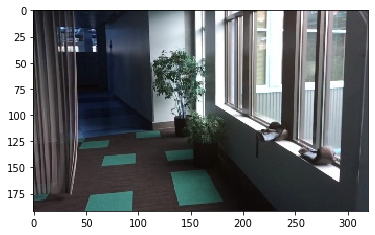

In [13]:
filename = 'data load/resize.hdf5'
with h5py.File(filename, 'r') as f:
    print(list(f.values()))
    image_x0 = f['image_x0']    # 실 데이터 공간에 접근할 변수를 할당한다. 
    image_x1 = f['image_x1']
    #image_x = f['image_x']
    image_y = f['image_y']
    #plt.imshow(f['image_x0'][0])
    plt.imshow(image_x1[1000])

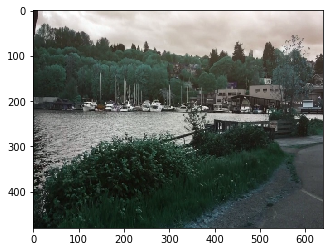

In [34]:
plt.imshow(test)

In [5]:
filename = 'data/train/half/half.hdf5'